# Logistic Regression and Evaluation Metrics

In [1]:
from IPython.display import Image

# inline plotting instead of popping out
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

# load utility classes/functions that has been taught in previous labs
# e.g., plot_decision_regions()
import os, sys
module_path = os.path.abspath(os.path.join('.'))
sys.path.append(module_path)
from lib import *

# <a name='BackLR'>Logistic Regression</a>
* [Logistic Regression](#LR) is a **classification algorithm** in combination with a decision rule that makes dichotomous the predicted probabilities of the outcome. 
* Currently, it is one of the most widely used classification models in Machine Learning.
* As discussed in the lecture, Logistic Regression predicts the label y^ of a given point x by
$$\hat {y}=arg max_{y}P(y|x;w)$$
* The condition probability is defined as
$$P(y|x;w)=σ(w^{⊤}x)^{y′}[1−σ(w^{⊤}x)]^{(1−y′)}$$
where $y′=\frac{y+1}{2}$. 
* Let's first plot the logistic function σ over $z=w^{⊤}x$
$$σ(z)=\frac{exp(z)}{exp(z)+1}=\frac{1}{1+exp(−z)}$$

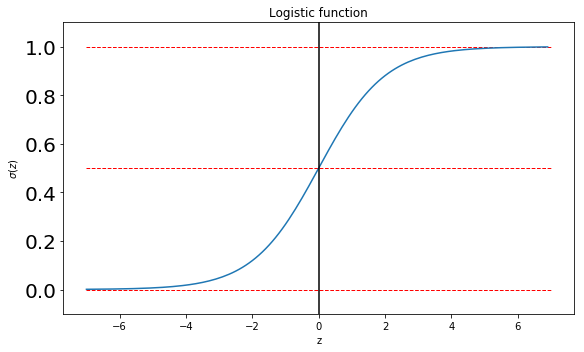

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma = logistic(z)

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(z, sigma)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.title('Logistic function')
plt.hlines(y=1.0, xmin=-7, xmax=7, color='red', linewidth = 1, linestyle = '--')
plt.hlines(y=0.5, xmin=-7, xmax=7, color='red', linewidth = 1, linestyle = '--')
plt.hlines(y=0, xmin=-7, xmax=7, color='red', linewidth = 1, linestyle = '--')
plt.tight_layout()
for item in (ax.get_yticklabels()):
    item.set_fontsize(20)
plt.savefig('./output/fig-logistic.png', dpi=300)
plt.show()

* We can see that σ(z) approaches 1 when (z→∞), since e−z becomes very small for large values of z. Similarly, σ(z) goes downward to 0 for z→−∞ as the result of an increasingly large denominator. 
* The logistic function takes real number values as input and transforms them to values in the range [0,1] with an intercept at σ(z)=0.5.
* To learn the weights w from the training set X, we can use ML estimation:
$$arg max_{w}logP(X|w)$$
---------------------------
* This problem can be solved by gradient descent algorithm with the following update rule:
$$w(t+1)=w(t)−η∇wlogP(X|w^{(t)}),$$
where
$$∇_{w}logP(X|w^{(t)})=∑_{t=1}^{N}[y^{′(i)}−σ(w^{(t)⊤}x^{(i)})]x^{(i)}$$

---------------------------
* Once $w$ is solved, we can then make predictions by
$$\hat{y}=argmax_{y}P(y|x;w)=argmax_{y}{σ(w^{⊤}x),1−σ(w^{⊤}x)}=sign(w^{⊤}x).$$

* Logistic Regression is very easy to implement but performs well on linearly separable classes (or classes close to linearly separable).
* Similar to the Perceptron and Adaline, **the Logistic Regression model is also a linear model for binary classification**. 
* We can relate the Logistic Regression to our previous Adaline implementation.
* In Adaline, we used the identity function as the activation function. In Logistic Regression, this activation function simply becomes the logistic function (also called as sigmoid function) as illustrated below:
<img src='https://nthu-datalab.github.io/ml/labs/06_Logistic-Regression_Metrics/fig-logistic-regression.png' width='400'></img>

# Predicting Class-Membership Probability
* **One benefit of using Logistic Regression is that it is able to output the class-membership probability**.
* In fact, there are many applications where we are not only interested in predicting class labels, but also in estimating the class-membership probability.

# Training a Logistic Regression Model with Scikit-learn
* Scikit-learn implements a highly optimized version of logistic regression that also supports multiclass classification off-the-shelf. Let's use it to make predictions on the standardized Iris training dataset.
* <font color='Red'>NOTE:</font> 
    * Logistic Regression, like many other binary classification models, can be easily extended to multiclass classification via **One-vs-All** or other similar techniques. 

In [3]:
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/iris/iris.data', header=None)
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label']
display(df.head())

# for simplicity, consider only two features and two classes

X = df[['Petal length', 'Petal width']].values[50:150]
y, y_label = pd.factorize(df['Class label'].values[50:150])

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=1)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class labels: %s (mapped from %s)' % (np.unique(y), np.unique(y_label)))

# Standardize X

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

,Sepal length,Sepal width,Petal length,Petal width,Class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Training data points: 80
#Testing data points: 20
Class labels: [0 1] (mapped from ['Iris-versicolor' 'Iris-virginica'])


In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set', edgecolors='k')

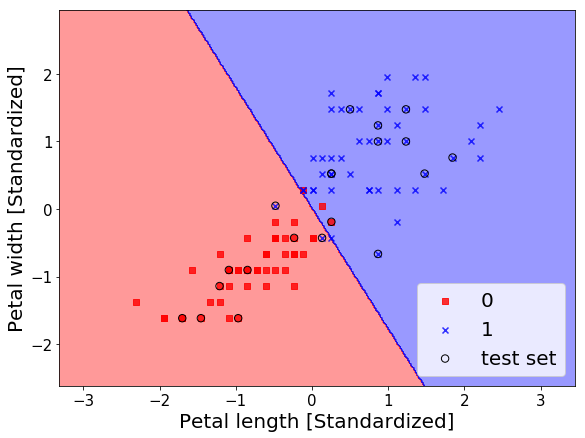

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

# plot decision regions
fig, ax = plt.subplots(figsize=(8,6))
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(y_train.size, 
                                                    y_train.size + y_test.size))
plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.legend(loc='lower right')
plt.tight_layout()
plt.legend(loc=4, prop={'size': 20})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('./output/fig-logistic-regression-boundray-2.png', dpi=300)
plt.show()

* The Logistic Regression class can predict the class-membership probability via the predict_proba() method. For example, we can predict the probabilities of the first testing point:

In [6]:
test_idx = 1
print('Correct label: %s\n' % y_label[y_test[test_idx]])

prob = lr.predict_proba(X_test_std[test_idx, :].reshape(1, -1))

print('Prob for class %s: %.2f' % (y_label[0], prob[:, 0]))
print('Prob for class %s: %.2f' % (y_label[1], prob[:, 1]))

Correct label: Iris-virginica

Prob for class Iris-versicolor: 0.01
Prob for class Iris-virginica: 0.99


* The prob array tells us that the model predicts a 99% chance that the sample belongs to the Iris-Virginica class, and a 1% chance that the sample is a Iris-Versicolor flower. 

# Regularization
* One way to regularize a logistic regression classifier is to add a weight decay term in the objective (or cost function), as in Ridge regression:
$$argmax_{w}logP(X|w)−\frac{α}{2} ∥w∥^{2}$$
where α>0 is a hyperparameter that controls the trade-off between maximizing the log likelihood and minimizing the weight.
* Note that the Logistic Regression class implemented in Scikit-learn uses the hyperparameter C=1/α due to convention.

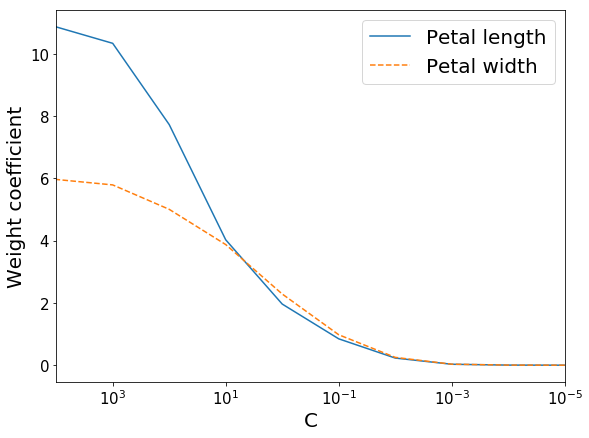

In [7]:
weights, params = [], []
for c in np.arange(-5, 5, dtype='float32'):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    # get the coefficients of w
    weights.append(lr.coef_[0])
    params.append(10**c)

fig, ax = plt.subplots(figsize=(8,6))
weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='Petal length')
plt.plot(params, weights[:, 1],
         label='Petal width', linestyle='--')
plt.xlim(10**4, 10**-5)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Weight coefficient')
plt.legend(loc='upper right')
plt.tight_layout()
plt.legend(loc=1, prop={'size': 20})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('./output/fig-logistic-regression-c.png', dpi=300)
plt.show()

# Evaluation Metrics for Binary Classifiers
* We evaluate the performance of a classifier using the **accuracy metric**.
* Although accuracy is a general and common metric, there are several other evaluation metrics that allow us to quantify the performance of a model from different aspects.

# <a name='BackCM'>Confusion Matrix</a>
* Before we get into the details of different evaluation metrics, let's print the so-called [confusion matrix](#CM), a square matrix that reports the counts of the **true positive, true negative, false positive, and false negative predictions** of a classifier, as shown below:
<img src='https://nthu-datalab.github.io/ml/labs/06_Logistic-Regression_Metrics/fig-confusion.png' width='300'></img>
* The confusion matrix of our logistic regressor over the Iris dataset is shown as follows:

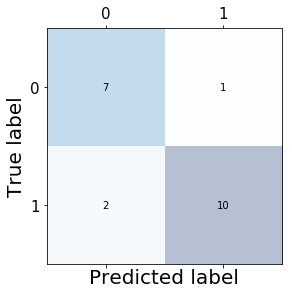

In [8]:
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(random_state=0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(4,4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('./output/fig-logistic-regression-confusion-2.png', dpi=300)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.show()

* The meaning of each entry in the above confusion matrix is straightforward. 
* For example, the cell at (1,0) means that 2 positive testing points are misclassified as negative. Confusion matrix helps us know not only the count of how many errors but how they are wrong. 
* Correct predictions counts into the diagonal entries. A good performing classifier should have a confusion matrix that is a diagonal matrix which means that the entries outside the main diagonal are all zero. 
* The **error rate (ERR)** and **accuracy (ACC)** we have been using can be defined as follows:
$$ERR=\frac{FP+FN}{P+N}, (the lower, the better)$$
$$ACC=\frac{TP+TN}{P+N}=1−ERR. (the higher, the better)$$

## True and False Positive Rate
* The **true positive rate (TPR)** and **false positive rate (FPR)** are defined as:
$$FPR=\frac{FP}{N}, (the lower, the better)$$
$$TPR=\frac{TP}{P}. (the higher, the better)$$
* TPR and FPR are metrics particularly useful for tasks with imbalanced classes. For example, if we have 10% positive and 90% negative examples in the training set, then a dummy classifier that always give negative predictions will be able to achieve 90% accuracy. The accuracy metric is misleading in this case. On the other hand, by checking the TPR which equals to 0%, we learn that the dummy classifier is not performing well.

## Precision, Recall, and $F_{1}$-Score
* The **Precision (PRE)** and **recall (REC)** metrics are defines as:
$$PRE=\frac{TP}{P′}, (the higher, the better)$$
$$REC=\frac{TP}{P}=TPR. (the higher, the better)$$
* Basically, PRE means "how many points predicted as positive are indeed positive;" while REC refers to "how many positive points in the ground truth are successfully identified as positive." PRE and REC are useful metrics if we care specifically about the performance of positive predictions.
* In practice, we may combine PRE and REC into a single score called the F1-score:
$$F_{1}=2\frac{(PRE∗REC)}{PRE+REC}, (the higher, the better)$$
which reaches its best value at 1 and worst at 0.

## Evaluation Metrics for Soft Classifiers
* Many classifiers, such as Adaline and Logistic Regression, can make "soft" predictions (i.e., real values instead of the "hard" 1 or -1). We may "harden" the soft predictions by defining a **decision threshold θ**. For example, suppose a classifier makes soft predictions in range [−1,1] that are sorted as follows:
<img src='https://nthu-datalab.github.io/ml/labs/06_Logistic-Regression_Metrics/fig-roc-threshold.png' width='100'></img>
* We can define a threshold θ=0.8 such that points with scores larger/smaller than 0.8 become positive/negative outputs. It is clear that the performance of the classifier will vary as we use different values for threshold.

## <a name='BackROC'>Receiver Operating Characteristic (ROC) Curve</a>
* The [**receiver operator characteristic (ROC) curve**](#ROC) measures the performance of a classifier at **all** possible thresholds. We can draw an ROC curve by following the steps:
    1. Rank the soft predictions from highest to lowest;
    2. For each indexing threshold θ that makes the first θ points positive and the rest negative, θ=1,⋯,|X|, calculate the $TPR^{(θ)}$ and $FPR^{(θ)}$;
    3. Draw points ($TPR^{(θ)}$,$FPR^{(θ)}$) in a 2-D plot and connect the points to get an ROC curve.
* Let's plot the ROC curve of our logistic regressor:

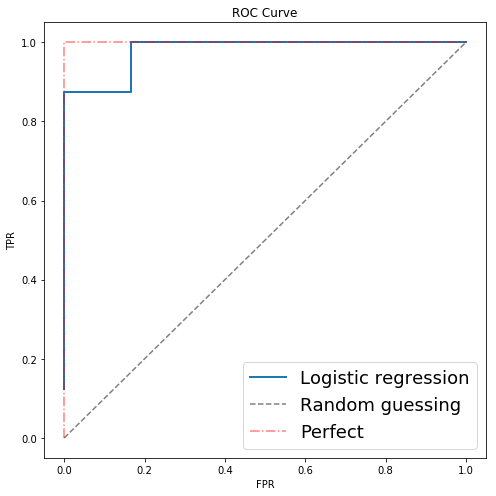

In [9]:
from sklearn.metrics import roc_curve
from scipy import interp
from cycler import cycler

lr = LogisticRegression(random_state=0)
lr.fit(X_train_std, y_train)

fig = plt.figure(figsize=(7,7))

# mean_tpr = 0.0
# mean_fpr = np.linspace(0, 1, 100)
# all_tpr = []

probas = lr.predict_proba(X_test_std) 

## we use feature 1 as positive label
fpr, tpr, thresholds = roc_curve(y_test,
                                 probas[:, 0],
                                 pos_label=0)

plt.plot(fpr, tpr, lw=2,
         label='Logistic regression')
    
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color='gray',
         label='Random guessing')

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle='-.',
         alpha=0.5,
         color='red',
         label='Perfect')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.legend(loc=4, prop={'size': 18})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('./output/fig-roc-lg.png', dpi=300)
plt.show()

# How does the ROC curve of a "good" classifier look like?
* The ROC curve of a perfect classifier would have a line that goes from bottom left to top left and top left to top right. 
* On the other hand, if the ROC curve is just the diagonal line then the model is just doing random guessing.
* Any useful classifier should have an ROC curve falling between these two curves. 

# Model Comparison
* ROC curves are useful for comparing the performance of different classifiers over the same dataset. For example, suppose we have three classifiers A, B, and C and their respective ROC curves, as shown below:
<img src='https://nthu-datalab.github.io/ml/labs/06_Logistic-Regression_Metrics/fig-roc-compare.png' width='150'></img>
* It is clear that the classifiers B and C are better than A. But how about B and C?
    * This can also be answered by ROC curves:
        * If we tolerate no more than 10% FPR, we should pick B at an indexing threshold θ=0.15|X| to get 60% TPR;
        * If we tolerate 40% FPR, then pick C at θ=0.4|X|, which gives 90% TPR. 

# <a name='BackAUC'>Area Under the Curve (AUC)</a>
* We can reduce an ROC curve to a single value by calculating the [area under the curve (AUC)](#AUC).
* A perfect classifier has AUC=1.0, and random guessing results in AUC=0.5.
* It can be shown that AUC is equal to the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one.
* Let's compute the AUC of our logistic regressor:

In [10]:
from sklearn.metrics import auc

print('AUC: %.2f' % auc(fpr, tpr))

AUC: 0.98


# Evaluation Metrics for Multiclass Classification
* In multiclass classification problem, we can extend the above metrics via one-vs-all technique, where we treat one class as "positive" and the rest as "negative" and compute a score for the class.
* If there are K classes, then we compute K scores, one for each class. However, if we just want to have a single final score, we need to decide how to combine these scores.
* Scikit-learn implements the **macro** and **micro averaging** methods. For example, the micro-average of $K$ precision scores is calculated as follows:
$$PRE_{micro}=\frac{TP^{(1)}+⋯+TP^{(K)}}{P′^{(1)}+⋯+P′^{(K)}}$$
while the macro-average is simply the average of individual PRE's:
$$PRE_{macro}=\frac{PRE^{(1)}+⋯+PRE^{(K)}}{K}$$
* Micro-averaging is useful if we want to weight each data point or prediction equally, whereas macro-averaging weights all classes equally. Macro-average is the default in Scikit-learn.
* Let's train a multiclass logistic regressor and see how it performs:

#Training data points: 16 + 33 + 31 = 80
#Testing data points: 4 + 17 + 19 = 40
Class labels: [0 1 2] (mapped from ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'])


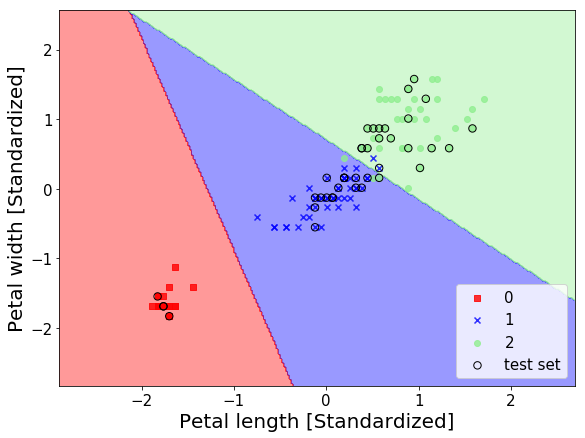

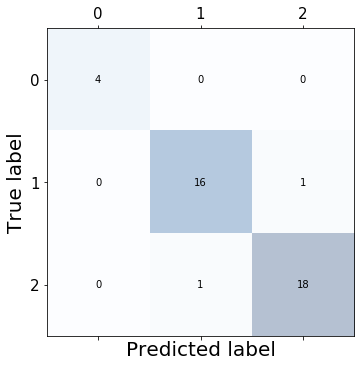

[Precision]
Individual: 1.00, 0.94, 0.95
Micro: 0.95
Macro: 0.96

[Recall]
Individual: 1.00, 0.94, 0.95
Micro: 0.95
Macro: 0.96

[F1-score]
Individual: 1.00, 0.94, 0.95
Micro: 0.95
Macro: 0.96


In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score
from lib import *

# prepare datasets

X = df[['Petal length', 'Petal width']].values[30:150,]
y, y_label = pd.factorize(df['Class label'].values[30:150])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1)

print('#Training data points: %d + %d + %d = %d' % ((y_train == 0).sum(), 
                                                    (y_train == 1).sum(), 
                                                    (y_train == 2).sum(), 
                                                     y_train.size))
print('#Testing data points: %d + %d + %d = %d' % ((y_test == 0).sum(), 
                                                    (y_test == 1).sum(), 
                                                    (y_test == 2).sum(), 
                                                     y_test.size))
print('Class labels: %s (mapped from %s)' % (np.unique(y), np.unique(y_label)))

# standarize X

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# training & testing

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

# plot decision regions
fig, ax = plt.subplots(figsize=(8,6))

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(y_train.size, 
                                     y_train.size + y_test.size))
plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.legend(loc=4, prop={'size': 15})
plt.tight_layout()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('./output/fig-logistic-regression-boundray-3.png', dpi=300)
plt.show()

# plot confusion matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.savefig('./output/fig-logistic-regression-confusion-3.png', dpi=300)
plt.show()

# metrics

print('[Precision]')
p = precision_score(y_true=y_test, y_pred=y_pred, average=None)
print('Individual: %.2f, %.2f, %.2f' % (p[0], p[1], p[2]))
p = precision_score(y_true=y_test, y_pred=y_pred, average='micro')
print('Micro: %.2f' % p)
p = precision_score(y_true=y_test, y_pred=y_pred, average='macro')
print('Macro: %.2f' % p)

print('\n[Recall]')
r = recall_score(y_true=y_test, y_pred=y_pred,average=None)
print('Individual: %.2f, %.2f, %.2f' % (r[0], r[1], r[2]))
r = recall_score(y_true=y_test, y_pred=y_pred, average='micro')
print('Micro: %.2f' % r)
r = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
print('Macro: %.2f' % r)

print('\n[F1-score]')
f = f1_score(y_true=y_test, y_pred=y_pred, average=None)
print('Individual: %.2f, %.2f, %.2f' % (f[0], f[1], f[2]))
f = f1_score(y_true=y_test, y_pred=y_pred, average='micro')
print('Micro: %.2f' % f)
f = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
print('Macro: %.2f' % f)

* We can see that the micro average reports more conservative scores. This is because it takes into account the class size. In our testing set, the first class is smaller than the others so its score (1.00) contributes less to the final score. 

# Assignment
### Goal:
* Predict the presence or absence of cardiac arrhythmia in a patient. 

### Your code file should contain:
1. Loading of dataset.
2. Splitting of dataset to training and testing data (test_size = 20% of the whole dataset)
3. Building of a self-designed Logistic Regression model. (Complete the TODO parts provided below.)
4. Plotting of the confusion matrix. (Label 0 as positive)
5. Computing the F1-score of this confusion matrix. The F1-score should be at least 0.75.

In [12]:
import pandas as pd
import numpy as np

#load the data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                   'arrhythmia/arrhythmia.data', header=None, sep=',', engine='python')

display(data.head(3))

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10


* How big is the dataset?

In [13]:
print('%d rows and %d columns' % (data.shape[0],data.shape[1]))

452 rows and 280 columns


* The last column of the dataset is the class label. It contains the 16 ECG classifications:

In [14]:
np.unique(data[len(data.columns)-1])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 14, 15, 16])

* Let's make that column (class label) dichotomous.
* Value is 0 if ECG is normal, 1 otherwise

In [15]:
data['arrhythmia'] = data[len(data.columns)-1].map(lambda x: 0 if x==1 else 1)
data = data.drop(len(data.columns)-2, axis=1)

* Are the groups balanced?

In [16]:
data.groupby(['arrhythmia']).size()

arrhythmia
0    245
1    207
dtype: int64

* Some columns have missing values denoted as '?'
* To make the preprocessing simpler, let's just retain the columns with numeric values.

In [17]:
data = data._get_numeric_data()
print('%d rows and %d columns' % (data.shape[0],data.shape[1]))

452 rows and 275 columns


In [18]:
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,arrhythmia
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,1
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,1
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,1


In [19]:
X = data.iloc[:, :-1]  # The first to second-last columns are the features
y = data.iloc[:, -1]   # The last column is the ground-truth label
print(np.unique(y))
print(X.shape)

[0 1]
(452, 274)


In [20]:
# splitting the dataset to training and validation datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20181004)

In [21]:
# Standardizing the training and test datasets
# Note that we are scaling based on the information from the training data
# Then we apply the scaling that is done from training data to the test data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Please continue working from here.

In [22]:
class LogisticRegression(object):

    def __init__(self, eta=0.05, n_epoch=100, random_state=1):
        self.eta = eta
        self.n_epoch = n_epoch
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = self.loss(output, y)
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def loss(self, output, y):
        """Calculate loss"""
        # TODO
        return (-y * np.log(output) - (1 - y) * np.log(1 - output)).mean()
    
    def activation(self, z):
        """Compute logistic sigmoid activation"""
        # TODO
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        """Return class label after unit step"""
        # TODO
        return self.activation(self.net_input(X)) >= 0.5 

## Accurancy

In [23]:
from sklearn.metrics import accuracy_score

logistic = LogisticRegression()
logistic.fit(X_train_std, y_train)
y_pred = logistic.predict(X_test_std)

print('Accuracy (logistic, sklearn): %.2f' % accuracy_score(y_pred, y_test))

/home/epl/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
/home/epl/.local/lib/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


Accuracy (logistic, sklearn): 0.70


## Confusion Matrix

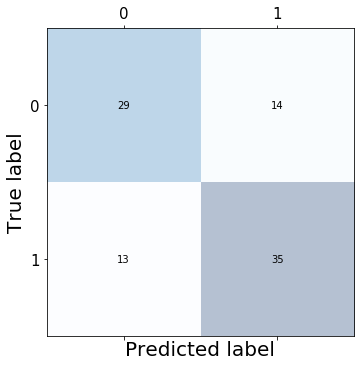

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.show()

## $f_{1}$-score

In [25]:
from sklearn.metrics import f1_score

print('[F1-score]')
f = f1_score(y_true=y_test, y_pred=y_pred, average='micro')
print('Micro: %.2f' % f)
f = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
print('Macro: %.2f' % f)

[F1-score]
Micro: 0.70
Macro: 0.70


# <a name='LR'>Logistic Regression</a>
* 前言:
    * Perceptron 能夠讓我們成功達成二元分類，但我們只能知道預測結果是A還是B，沒辦法知道是A、是B的機率是多少
    * 例如我們要根據今天的溫度、濕度、風向來預測明天的天氣，通常我們會需要知道明天是晴天的機率以及雨天的機率，來決定是否帶傘具出門
    * 使用Logistic Regression就可以幫我們達成這樣的目標
* Logistic Regression(邏輯斯回歸)是一個**分類的模型**，而非回歸模型
* 分類的模型大致跟Perceptron類似
    * Perceptron是根據 $w0*x0+w1*x1+…+wn*xn >0$ 或$≤0$來判斷成A或B類
    * Logistic Regression則是一個平滑的曲線，當$w0*x0+w1*x1+…+wn*xn$越大時判斷成A類的機率越大，越小時判斷成A類的機率越小
* Perceptron與Logistic Regression模型差異:
    <img src='https://cdn-images-1.medium.com/max/1400/1*3kUjZYHT6_Q7JrMgc17f4w.png' width='500'></img>
* Perceptron與Logistic Regression的actination function:
    <img src='https://cdn-images-1.medium.com/max/800/1*EipHXlFAXKHKLOcjhBnhYQ.png' width='500'></img>
* Logistic Regression利用的是sigmoid函數
    * Sigmoid函數，也稱為logistic function
    * 函數特性: y 的值介於 0~1，這樣的分布也符合機率是在0~1的範圍中
    * 使用Logistic function的原因: 介於0~1的平滑函數中相對簡單的
* Logistic Regression不需要像Perceptron演算法需要去看一個一個的資料點來做更新，Logistic Regression有數學解的方法可以直接找到一組$W$
    * 可以使用微積分以及梯度下降的知識來讓上方的式子變為一個相對的最大值
-----------------------------------------------

* 公式:
<img src='https://cdn-images-1.medium.com/max/800/1*zyMqBU1fDzQmoYdIpnd9pA.png' width='250'></img>
    * 為了數學推導方便，之前我們將二元分類的A類以+1表示、B類以-1表示，現在將A類改以+1表示、B類以0表示
    * 想要找到一組w，能夠將下方的式子變成最大值，那組w就是我們要找的線($z=w*x$)
    * 式子是希望當y=1的時候 ∅(z) 越靠近1（判斷成A類的機率越大），由於1-y是0所以右邊的項會是1，當y=0時左邊這項會是1右邊這項希望 ∅(z) 越靠近0越好（判斷成B類的機率越大）
-----------------------------------------------
* [Reference](https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-3%E8%AC%9B-%E7%B7%9A%E6%80%A7%E5%88%86%E9%A1%9E-%E9%82%8F%E8%BC%AF%E6%96%AF%E5%9B%9E%E6%AD%B8-logistic-regression-%E4%BB%8B%E7%B4%B9-a1a5f47017e5)
* [Go to Logistic Regression](#BackLR)

# <a name='CM'>Confusion Matrix</a>
* 所謂的Confusion Matrix，表格兩欄代表實際情形正向或反向，兩列代表預測情形正向或反向
<img src='http://www.ycc.idv.tw/media/mechine_learning_measure/mechine_learning_measure.002.jpeg' width='400'></img>
* 舉iphone當例子，iphone具有指紋識別解鎖系統:
    * 你來按壓，而iphone也順利解鎖了，情形就屬於左上角的情況，稱為True Positive，也就是「正確的正向預測」
    * 你按壓iphone，結果iphone認不得你的指紋，這就是左下角的情況，稱為False Negative，也就是「錯誤的負向預測」
    * 朋友來按，正常情形你朋友的指紋應該沒辦法解鎖，這是右下角的情況，稱為True Negative，也就是「正確的負向預測」
    * 朋友來按，你朋友的指紋解鎖，這是右上角的情況，稱為False Positive，也就是「錯誤的正向預測」
* 從上面的描述，我們當然希望我們的模型True Positive和True Negative都可以多多出現，而False Positive和False Negative可以盡量不要出現，因此這兩種狀況就稱之為Error，又各自又命名為Type I Error和Type II Error，這兩種錯誤，錯的很不一樣
* 如果今天指紋辨識不是放在iphone，而是放在你家大門鎖上，那你最不希望發生哪類錯誤？當然是Type I Error，我寧可被關在門外進不去，也不要有陌生人可以進我家囉！
* 如果今天這個辨別系統是用在Google廣告，Google Ad會預測一個產品的潛在客戶，並做廣告投放，這個時候反而是較不希望Type II Error發生，寧可錯殺一百個也不要放過一個。
-----------------------
* [Reference](https://www.ycc.idv.tw/confusion-matrix.html)
* [Go to Confusion Matrix](#BackCM)

# <a name='ROC'>ROC曲線</a>
* receiver operating characteristic curve，或者叫ROC曲線，是一種坐標圖式的分析工具
* 以圖像的方式呈現二分類系統(binary classifier system)在特定的分類或閾值(discrimination threshold)下的表現
* 圖形的縱軸(y-axis)為真陽性率(true positive rate; TPR)，又稱為敏感度(sensitivity)；橫軸(x-axis)為偽陽性率(false-posiitive rate; FPR)，以1 – 特異度(specificity)表示
    * 敏感度為將結果正確判斷為陽性的機率
    * 特異度將結果正確判斷為負向或陰性的機率
* 當指定一個分界點(cut-point)來區分檢驗的陽性與陰性時，這個分界點會影響到診斷工具的敏感度(sensitivity)及特異度(specificity)
* ROC曲線在判別時，會以對角線為一個參考線:
    * 若是檢驗工具的ROC曲線剛好落在對角的參考線上，則表示檢驗工具對於此疾病的診斷**沒有鑑別性**
    * 若是ROC曲線愈往左上方移動，表示檢驗工具對於疾病的敏感度愈高，且偽陽性率愈低，亦即此工具的鑑別力較佳，而最靠近左上角的的點 (0,1) 是錯誤歸類最少的切點，其敏感度(sensitivity)是最大的且偽陽性率(1 –specificity)是最小的
----------------

* [Reference](http://estat.pixnet.net/blog/post/61795603-roc%E6%9B%B2%E7%B7%9A-%28receiver-operating-characteristic-curve%29)
* [Go to ROC](#BackROC)

# <a name='AUC'>Area Under Curve (AUC)</a>
* 一般在判別檢驗工具的好壞時，除了看曲線的圖形之外，也可以利用曲線下的面積(Area Under Curv; AUC)來判別ROC曲線的鑑別力
* AUC數值的範圍從0到1，數值愈大愈好
* AUC數值一般的判別規則：
    * AUC=0.5 (no discrimination 無鑑別力)
    * 0.7≦AUC≦0.8 (acceptable discrimination 可接受的鑑別力)
    * 0.8≦AUC≦0.9 (excellent discrimination 優良的鑑別力)
    * 0.9≦AUC≦1.0 (outstanding discrimination 極佳的鑑別力)
---------------------------
* [Reference](http://estat.pixnet.net/blog/post/61795603-roc%E6%9B%B2%E7%B7%9A-%28receiver-operating-characteristic-curve%29)
* [Go to AUC](#BackAUC)  